# Data Science Practice

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()

## Reading raw data from file

In [2]:
#Load the csv data with file in the same directory
raw_data = pd.read_csv('Practice_example.csv')

In [3]:
#check the first five rows of the data
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Processing before regression

### Exploring the descriptive statistics of the variables

In [4]:
raw_data.describe(include='all') #setting include='all' to display all the categories

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determine the data we are interest in
Since the category 'Model' is not relevant to the regression process, we can drop that category with `drop()`.

In [5]:
data = raw_data.drop('Model',axis=1) #The first column:axis=0 / the first row:axis=1
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values (mv)
According to the **Count** of the **Price** and **EngineV**, we can state that there are some missing values in these 2 categories.
<br><br>
We first use `isnull()` (since True = the data point is missing, while False = the data point is not missing) to show whether the data point is null. Then we can sum them with `sum()`, this will give us the total number of missing values feature-wise.

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Since the ammount is less than **5%** of the data, we then use `dropna()` from *pandas* to eliminate data that contain missing value. Usually, it is not recommended to drop all missin values.
Here we can delete with rows (axis=0 or axis='index') or with columns(axis=1 or axis='columns'). 

In [7]:
data_no_mv = data.dropna(axis=0)

In [8]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


Now we obtain the same **count** for each category.

### Exploring the PDFs

We can use *probablity density function (PDF)* to easily spot anamilies for each variable, such as outliers. The PDF is often the basis on which we decide whether we want to transform a feature.

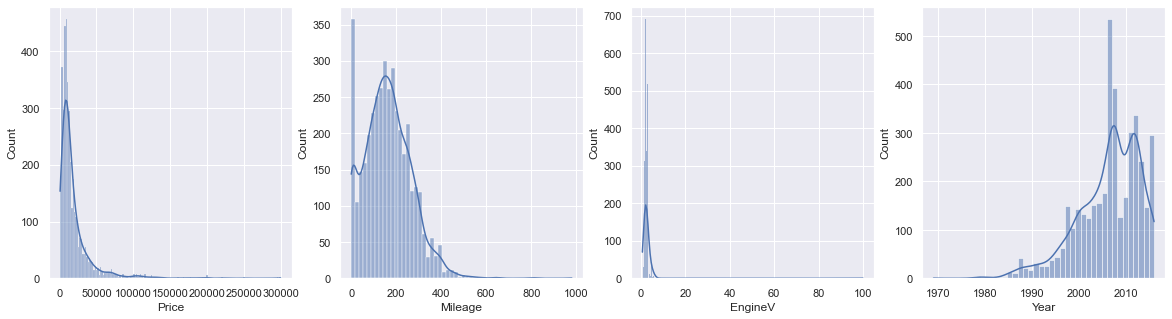

In [9]:
f, axes = plt.subplots(1, 4, figsize=(20,5))
sns.histplot(data_no_mv['Price'],kde=True,ax=axes[0])
sns.histplot(data_no_mv['Mileage'],kde=True,ax=axes[1])
sns.histplot(data_no_mv['EngineV'],kde=True,ax=axes[2])
sns.histplot(data_no_mv['Year'],kde=True,ax=axes[3])

plt.show()

On the PDF plots, there're outliers for each variable.

### Dealing with outliers

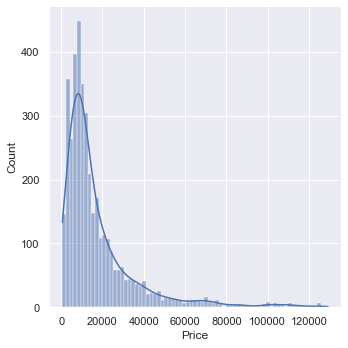

In [10]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
sns.displot(data_1['Price'],kde=True)

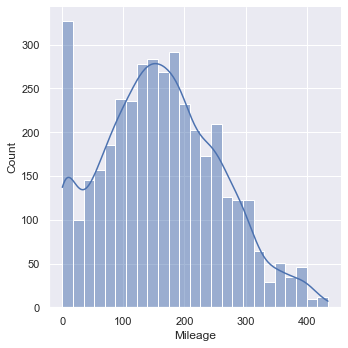

In [11]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.displot(data_2['Mileage'],kde=True)

For EngineV (engine volume), the data has some outliers that are extremely large, such as 99.99 or 75. A simple Google search can indicate the natural domain of this variable are usually below 6.5L.

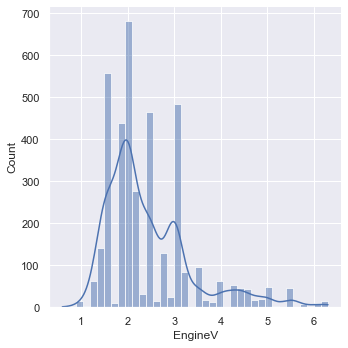

In [12]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.displot(data_3['EngineV'], kde=True)

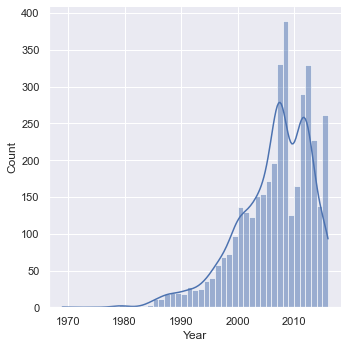

In [13]:
p = data_3['EngineV'].quantile(0.01)
data_4 = data_3[data_3['EngineV']>p]
sns.displot(data_4['Year'], kde=True)

In [14]:
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3872,3872.000000,3872,3872.000000,3872.000000,3872,3872,3872.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,844,NaN,1493,NaN,NaN,1810,3511,NaN
mean,NaN,18083.488773,NaN,162.234504,2.460434,NaN,NaN,2006.366477
std,NaN,19130.552393,NaN,95.882063,0.939911,NaN,NaN,6.583780
min,NaN,600.000000,NaN,0.000000,1.300000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,93.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21625.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [15]:
data_cleaned = data_4.reset_index(drop=True)

In [16]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3872,3872.000000,3872,3872.000000,3872.000000,3872,3872,3872.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,844,NaN,1493,NaN,NaN,1810,3511,NaN
mean,NaN,18083.488773,NaN,162.234504,2.460434,NaN,NaN,2006.366477
std,NaN,19130.552393,NaN,95.882063,0.939911,NaN,NaN,6.583780
min,NaN,600.000000,NaN,0.000000,1.300000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,93.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21625.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


## Checking the OLS assumptions

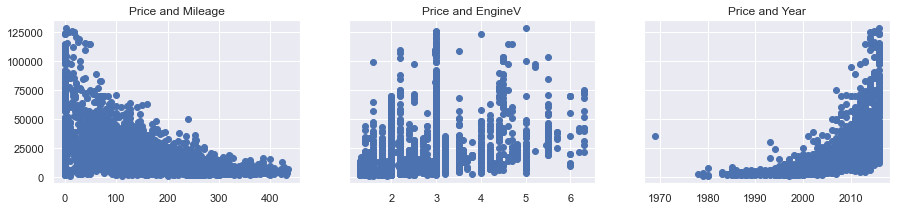

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax1.set_title('Price and Mileage')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax3.set_title('Price and Year')

plt.show()

### Relaxing the assumptions

In [18]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log Price'] = log_price

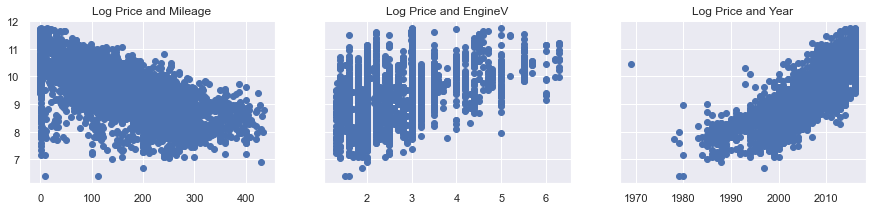

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Mileage'], data_cleaned['Log Price'])
ax1.set_title('Log Price and Mileage')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Log Price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Year'], data_cleaned['Log Price'])
ax3.set_title('Log Price and Year')

plt.show()

In [20]:
data_cleaned = data_cleaned.drop('Price',axis=1)

In [21]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log Price'], dtype=object)

In [22]:
data_cleaned = data_cleaned[['Log Price', 'Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration', 'Year']]

In [23]:
data_cleaned

,Log Price,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year
0,8.342840,BMW,sedan,277,2.0,Petrol,yes,1991
1,8.974618,Mercedes-Benz,van,427,2.9,Diesel,yes,1999
2,9.495519,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003
3,10.043249,Audi,crossover,240,4.2,Petrol,yes,2007
4,9.814656,Toyota,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3867,9.792556,Toyota,sedan,35,1.6,Petrol,yes,2014
3868,11.736069,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014
3869,8.779557,BMW,sedan,1,3.5,Petrol,yes,1999
3870,8.987197,BMW,sedan,194,2.0,Petrol,yes,1985


### Multicollinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns.values

In [25]:
vif

,VIF,Features
0,3.835116,Mileage
1,7.855812,EngineV
2,10.749163,Year


We can see that the **Year** has the highest *variance inflation factor (vif)*, which will probably cause the problem with multicollinearity, so here we can drop it. At the same time we drop it, the vif of **Mileage** and **EngineV** will decrease.

In [26]:
data_no_multicollinearity = data_cleaned.drop('Year',axis=1)

## Create dummy variables

In [27]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [28]:
data_with_dummies.head()

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [29]:
data_preprocessed = data_with_dummies

## Linear regression model

### Declare the inputs and targets

In [30]:
inputs = data_preprocessed.drop('Log Price',axis=1)
targets = data_preprocessed['Log Price']

### Sample Scaling

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [33]:
inputs_scaled = scaler.transform(inputs)

In [34]:
from sklearn.model_selection import train_test_split

#We split the inputs and targets into four parts.
#The ratio between train and test data is stated as test_size.
#The random_state will generate random sets of data everytime we run the code with random_state=shuffle.
#If we set specific number(e.g. 365), it will still generate random sets, but will not change while reloading the code.
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [35]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [36]:
y_hat = reg.predict(x_train)

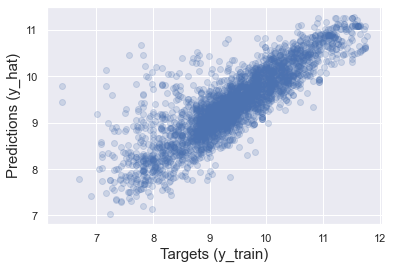

In [37]:
plt.scatter(y_train, y_hat, alpha=0.2)
plt.xlabel('Targets (y_train)', fontsize=15) #The value we used to train the model
plt.ylabel('Predictions (y_hat)', fontsize=15) #The value predicted by the model we trained
plt.show()

In [38]:
reg.score(x_train, y_train)

0.7239941992255612

In [39]:
reg.coef_

array([-0.45997747,  0.22235071,  0.03846509,  0.02600599, -0.12095554,
       -0.1640493 , -0.03966226, -0.07286286, -0.14214077, -0.10181917,
       -0.19656689, -0.12562407, -0.15783451, -0.13243578, -0.03192796,
       -0.15411102,  0.30860035])

In [40]:
reg.intercept_

9.399530560513776

In [41]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.459977
1,EngineV,0.222351
2,Brand_BMW,0.038465
3,Brand_Mercedes-Benz,0.026006
4,Brand_Mitsubishi,-0.120956
5,Brand_Renault,-0.164049
6,Brand_Toyota,-0.039662
7,Brand_Volkswagen,-0.072863
8,Body_hatch,-0.142141
9,Body_other,-0.101819


## Testing

In [42]:
y_hat_test = reg.predict(x_test)

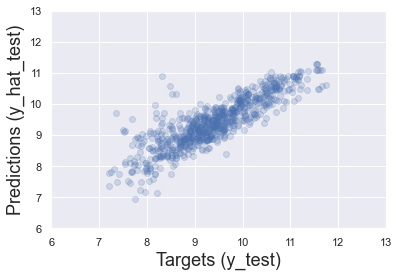

In [43]:
original_fig = plt.figure()
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

If we obtain a perfect model, y_test will be equal to y_hat_test, thus showing a 45-degree line on the graph. Therefore, we can see how closed the distribution is to the 45-degree line. 

### Manual check
We can also calculate the differences between the model's predictions and the actual targets.

In [44]:
df_performance = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_performance.head()

,Prediction
0,5107.435446
1,8955.762646
2,23363.778537
3,15311.249084
4,17716.198928


In [45]:
df_performance['Target'] = np.exp(y_test)
df_performance.head()

,Prediction,Target
0,5107.435446,NaN
1,8955.762646,7900.0
2,23363.778537,NaN
3,15311.249084,NaN
4,17716.198928,NaN


In [46]:
y_test.head()

2110     8.517193
2340     9.104980
3261    10.051908
3655     9.598998
1015     9.560997
Name: Log Price, dtype: float64

In [47]:
y_test.reset_index(drop=True).head()

0     8.517193
1     9.104980
2    10.051908
3     9.598998
4     9.560997
Name: Log Price, dtype: float64

In [48]:
df_performance['Target'] = np.exp(y_test.reset_index(drop=True))
df_performance.head()

,Prediction,Target
0,5107.435446,5000.0
1,8955.762646,9000.0
2,23363.778537,23200.0
3,15311.249084,14750.0
4,17716.198928,14200.0


In [49]:
df_performance['Diff.'] = df_performance['Prediction'] - df_performance['Target']
df_performance.head()

,Prediction,Target,Diff.
0,5107.435446,5000.0,107.435446
1,8955.762646,9000.0,-44.237354
2,23363.778537,23200.0,163.778537
3,15311.249084,14750.0,561.249084
4,17716.198928,14200.0,3516.198928


In [50]:
df_performance['Diff.%'] = np.abs(df_performance['Diff.']/df_performance['Target'])
df_performance

,Prediction,Target,Diff.,Diff.%
0,5107.435446,5000.0,107.435446,0.021487
1,8955.762646,9000.0,-44.237354,0.004915
2,23363.778537,23200.0,163.778537,0.007059
3,15311.249084,14750.0,561.249084,0.038051
4,17716.198928,14200.0,3516.198928,0.247620
...,...,...,...,...
770,3789.212416,5500.0,-1710.787584,0.311052
771,12310.567946,10800.0,1510.567946,0.139867
772,32991.799206,52777.0,-19785.200794,0.374883
773,10129.043174,6000.0,4129.043174,0.688174


In [51]:
df_performance.describe()

,Prediction,Target,Diff.,Diff.%
count,775.000000,775.000000,775.000000,775.000000
mean,16322.576358,18127.336374,-1804.760016,0.409119
std,13515.060099,19173.844215,10242.959276,0.800789
min,1016.386045,1350.000000,-84642.682889,0.000214
25%,7191.281143,6500.000000,-3515.183052,0.118705
50%,11749.143017,11500.000000,-242.930129,0.241221
75%,20554.092558,21700.000000,2335.926326,0.428681
max,78153.512702,125000.000000,49415.205104,12.052489


In [52]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df_performance.sort_values('Diff.%')

,Prediction,Target,Diff.,Diff.%
455,42909.1605,42900.0000,9.1605,0.0002
167,51515.2816,51500.0000,15.2816,0.0003
423,6504.6745,6500.0000,4.6745,0.0007
5,16770.5097,16800.0000,-29.4903,0.0018
476,38368.0129,38300.0000,68.0129,0.0018
...,...,...,...,...
640,21516.4280,3500.0000,18016.4280,5.1476
391,13605.1860,2200.0000,11405.1860,5.1842
566,38556.4255,4800.0000,33756.4255,7.0326
657,16276.4926,1550.0000,14726.4926,9.5010


---

# Improvement
In this part, we try to improve the linear regression model with different methods. Most of the steps are similar or same as previous process, so here we will just briefly use the codes without much explanation.

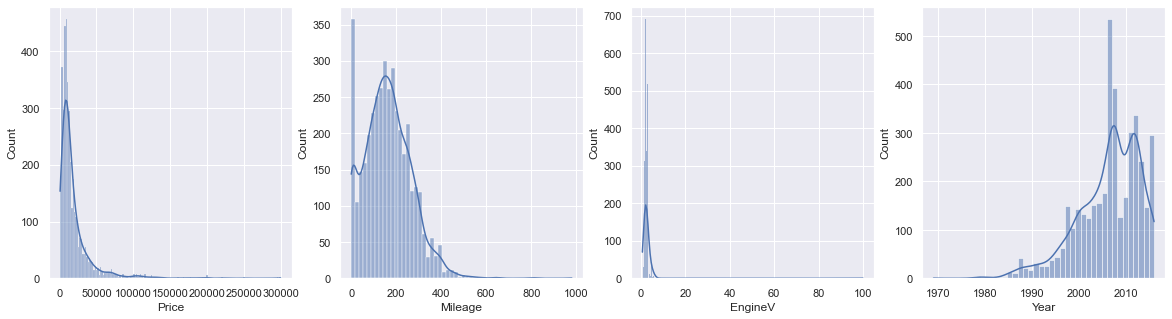

In [53]:
f, axes = plt.subplots(1, 4, figsize=(20,5))
sns.histplot(data_no_mv['Price'],kde=True,ax=axes[0])
sns.histplot(data_no_mv['Mileage'],kde=True,ax=axes[1])
sns.histplot(data_no_mv['EngineV'],kde=True,ax=axes[2])
sns.histplot(data_no_mv['Year'],kde=True,ax=axes[3])

plt.show()

## Dealing with more outliers
With larger number in `quantile()`, we narrow down the range to eliminate more outliers.

<AxesSubplot:xlabel='Price', ylabel='Count'>

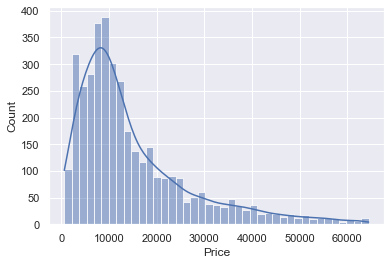

In [54]:
q = data_no_mv['Price'].quantile(0.95)
data_1 = data_no_mv[data_no_mv['Price']<q]
sns.histplot(data_1['Price'],kde=True)

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

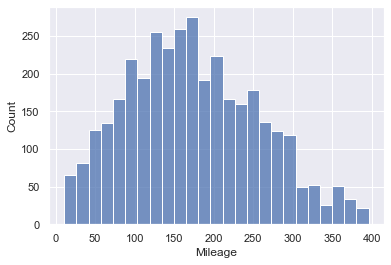

In [55]:
q = data_1['Mileage'].quantile(0.98)
p = data_1['Mileage'].quantile(0.05)
data_2 = data_1[data_1['Mileage']<q]
data_2 = data_2[data_2['Mileage']>p]
sns.histplot(data_2['Mileage'])

<AxesSubplot:xlabel='EngineV', ylabel='Count'>

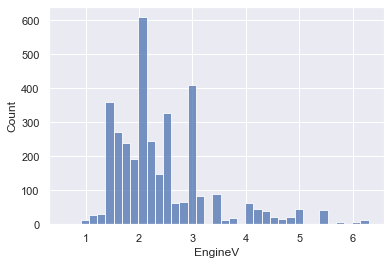

In [56]:
data_3 = data_2[data_2['EngineV']<6.5]
sns.histplot(data_3['EngineV'])

<AxesSubplot:xlabel='Year', ylabel='Count'>

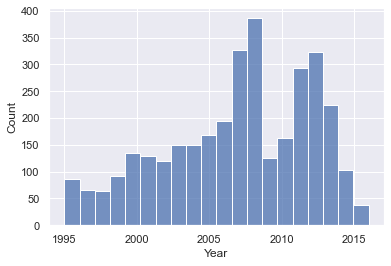

In [57]:
p = data_3['Year'].quantile(0.05)
data_4 = data_3[data_3['Year']>p]
sns.histplot(data_4['Year'])

In [58]:
data_4.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
2,Mercedes-Benz,13300.0000,sedan,358,5.0000,Gas,yes,2003
3,Audi,23000.0000,crossover,240,4.2000,Petrol,yes,2007
4,Toyota,18300.0000,crossover,120,2.0000,Petrol,yes,2011
7,Audi,14200.0000,vagon,200,2.7000,Diesel,yes,2006
8,Renault,10799.0000,vagon,193,1.5000,Diesel,yes,2012


In [59]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,Mercedes-Benz,13300.0000,sedan,358,5.0000,Gas,yes,2003
1,Audi,23000.0000,crossover,240,4.2000,Petrol,yes,2007
2,Toyota,18300.0000,crossover,120,2.0000,Petrol,yes,2011
3,Audi,14200.0000,vagon,200,2.7000,Diesel,yes,2006
4,Renault,10799.0000,vagon,193,1.5000,Diesel,yes,2012


## Relaxing OLS assumptions

In [60]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log Price'] = log_price

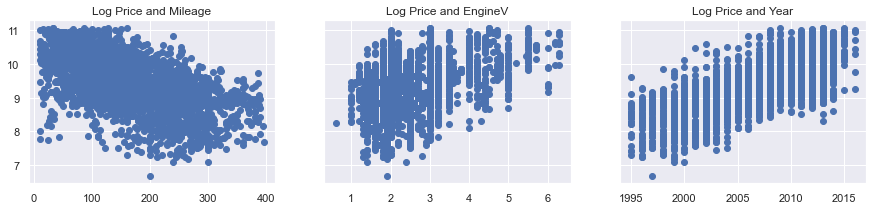

In [61]:
f, axes = plt.subplots(1, 3, sharey=True, figsize =(15,3))
axes[0].scatter(data_cleaned['Mileage'], data_cleaned['Log Price'])
axes[0].set_title('Log Price and Mileage')
axes[1].scatter(data_cleaned['EngineV'], data_cleaned['Log Price'])
axes[1].set_title('Log Price and EngineV')
axes[2].scatter(data_cleaned['Year'], data_cleaned['Log Price'])
axes[2].set_title('Log Price and Year')
plt.show()

In [62]:
variables = data_cleaned[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns.values
vif

,VIF,Features
0,5.3702,Mileage
1,7.6940,EngineV
2,11.5430,Year


The VIFs are apparently affected by the adjustment we made when dealing with outliers. Nevertheless, the feature with the largest VIF is still the Year, this trend will probably not be affected.

In [63]:
data_no_multicollinearity = data_cleaned.drop('Year', axis=1)

In [64]:
data_preprocessed = pd.get_dummies(data_no_multicollinearity, drop_first=True)

## Linear regression model

In [65]:
inputs = data_preprocessed.drop('Log Price',axis=1)
targets = data_preprocessed['Log Price']

scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [67]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [68]:
y_hat = reg.predict(x_train)

Text(0, 0.5, 'y_hat')

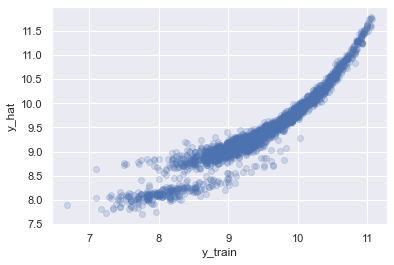

In [69]:
plt.scatter(y_train, y_hat, alpha=0.2)
plt.xlabel('y_train')
plt.ylabel('y_hat')

## Testing

In [70]:
y_hat_test = reg.predict(x_test)

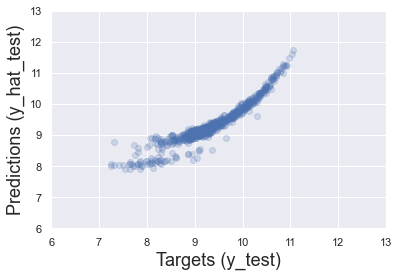

In [71]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Compared with the testing graph of the original linear regression model:

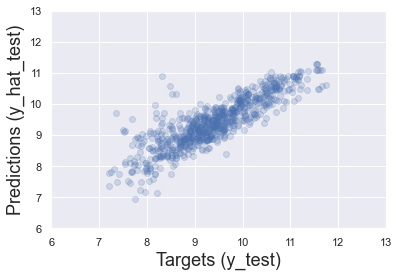

In [72]:
original_fig

### Manual check
We can manually calculate the percentage of the differences between our targets and predictions and compare the result with the previous one.

In [73]:
df_performance_2 = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_performance_2['Target'] = np.exp(y_test.reset_index(drop=True))
df_performance_2['Diff.'] = df_performance_2['Prediction'] - df_performance_2['Target']
df_performance_2['Diff.%'] = np.abs(df_performance_2['Diff.']/df_performance_2['Target'])

In [74]:
df_performance_2.describe()

,Prediction,Target,Diff.,Diff.%
count,668.0000,668.0000,668.0000,668.0000
mean,14918.9237,14810.7782,108.1455,0.1805
std,13891.7841,11129.0602,5024.4851,0.2338
min,2661.6660,1400.0000,-14668.5069,0.0000
25%,7844.7960,7499.7500,-1969.8856,0.0629
50%,10173.3769,11050.0000,-297.8176,0.1245
75%,16448.2416,19250.0000,809.1429,0.2070
max,125278.0710,63500.0000,61778.0710,3.3400


In [75]:
df_performance.describe()

,Prediction,Target,Diff.,Diff.%
count,775.0000,775.0000,775.0000,775.0000
mean,16322.5764,18127.3364,-1804.7600,0.4091
std,13515.0601,19173.8442,10242.9593,0.8008
min,1016.3860,1350.0000,-84642.6829,0.0002
25%,7191.2811,6500.0000,-3515.1831,0.1187
50%,11749.1430,11500.0000,-242.9301,0.2412
75%,20554.0926,21700.0000,2335.9263,0.4287
max,78153.5127,125000.0000,49415.2051,12.0525


## Conclusion

Compare two performances, the mean Diff.% is decreased and we obtain a graph which is more closed to a 45-degree line. Therefore, we can somehow state that the linear regression model is improved.